# 1.0 Installing Required Library and Matching Required Library Version

In [9]:
# pip install Sastrawi
# !pip install seaborn
# pip install plotly==5.18.0
# pip install nltk

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


## 1.1 Importing Necessities

In [83]:
import numpy as np
import pandas as pd 
import os
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tqdm import tqdm
import os

import spacy
from spacy.util import compounding
from spacy.util import minibatch
from sklearn.model_selection import train_test_split

In [84]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\Asani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |    

True

## 1.2 Importing Data

In [85]:
# data = pd.read_csv('data/data.csv', encoding='latin-1')
data = pd.read_csv('data/data.csv', encoding='latin-1')
alay_dict = pd.read_csv('data/data.csv', names = ['original', 'replacement'], encoding='latin-1')
abusive_dict = pd.read_csv('data/data.csv', encoding='latin-1')

In [86]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


# 2.0 Data Cleaning

In [87]:
from nltk.tokenize import word_tokenize

In [88]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\\+n', ' ', text)
    text = re.sub('\n'," ",text) # Remove every '\n'
    
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('RT',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('USER', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub(':', ' ', text)
    text = re.sub(';', ' ', text)
    text = re.sub('\\+n', ' ', text)
    text = re.sub('\n'," ",text) # Remove every '\n'
    text = re.sub('\\+', ' ', text)
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    word_tokens = word_tokenize(text)
    print(word_tokens)
    # stop_words = set(stopwords.words('indonesian'))
    # word_tokens_no_stopwords = [w for w in word_tokens if not w in stop_words]

    # text = ' '.join(['' if word in stop_words.stopword.values else word for word in text.split(' ')])
    # text = re.sub('  +', ' ', text) # Remove extra spaces
    # text = text.strip()
    return text

# def stemming(text):
#     return stemmer.stem(text)

def remove_emoticon_byte(text):
    text = text.replace("\\", " ")
    text = re.sub('x..', ' ', text)
    text = re.sub(' n ', ' ', text)
    text = re.sub('\\+', ' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_early_space(text):
    if text[0] == ' ':
        return text[1:]
    else:
        return text

# print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
# print("lowercase: ", lowercase("Halooo, duniaa!"))
# print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
# print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
# print("normalize_alay: ", normalize_alay("aamiin adek abis"))
# print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

In [89]:
def preprocess(text):
#     text = lowercase(text) # 1
#     text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = remove_unnecessary_char(text)
#     text = stemming(text) # 4
#     text = remove_stopword(text) # 5
    text = remove_emoticon_byte(text)
    text = remove_early_space(text)
    return text

def classify(hs):
    retval = ""
    if int(hs) == 1:
        retval = 'positive'
    else:
        retval = 'negative'
    return retval

In [90]:
data['text'] = data['Tweet'].apply(preprocess)
data['hs_class'] = data['HS'].apply(classify)
data[['text', 'hs_class']].sample(10)

,text,hs_class
3467,Apes beneeeer... dapet jadwal shift pagi cuma ...,negative
7358,Sarap nih pendukung Prabowo.,positive
12170,"Kits doakan,semoga 2019 President yang Amanah,...",negative
7789,Itu kampret bgt loh.Gak Kuat beli telor jadi t...,positive
4076,Karaoke ke Taman Sari itu berangkatnya dengan ...,positive
5865,Emang kebanyakan bangsa cebong goblok saya set...,positive
2844,#HTIBubar7Mei KACUNG KACUNG REZIM LAGI PENGALI...,positive
12452,meluat betul aku dengan orang kedai yang sombo...,positive
8878,pisang apaan asw gede bgt//',negative
10075,Di rejim ini dikeluarkan dan muncul istilah me...,negative


In [91]:
train = data[['hs_class', 'text']]
base_train = train
train.to_csv('train_preprocessed.csv', index = False)
train.sample(5)

,hs_class,text
1189,positive,Bukan milik kampret bodoh pastinya..ga sampe o...
1738,positive,JOKOWI - AHY VS PRABOWO - (Blm tau siapa ) #20...
12208,positive,Menunjukkan Kualitas dan Mental yang Labil dar...
5813,positive,alaaa bodoh aseng ni. '
3601,negative,Dan jangan munafik kita butuh visual yg wow un...


# 3.0 Data Visualization and WordCloud for Better Data Understanding and Exploration

In [92]:
temp = train.groupby('hs_class').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,hs_class,text
0,negative,7608
1,positive,5561


### Data Balancing

In [111]:
# balancing datasize
train = data[['hs_class', 'text']]
train_pos = train[train['hs_class']=='positive']
train_neg = train[train['hs_class']=='negative']
train_neg, removed = train_test_split(train_neg, test_size=(1.9/7), shuffle=True)
train = pd.concat([train_pos, train_neg])
temp = train.groupby('hs_class').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,hs_class,text
1,positive,5561
0,negative,5542


<Axes: xlabel='hs_class', ylabel='count'>

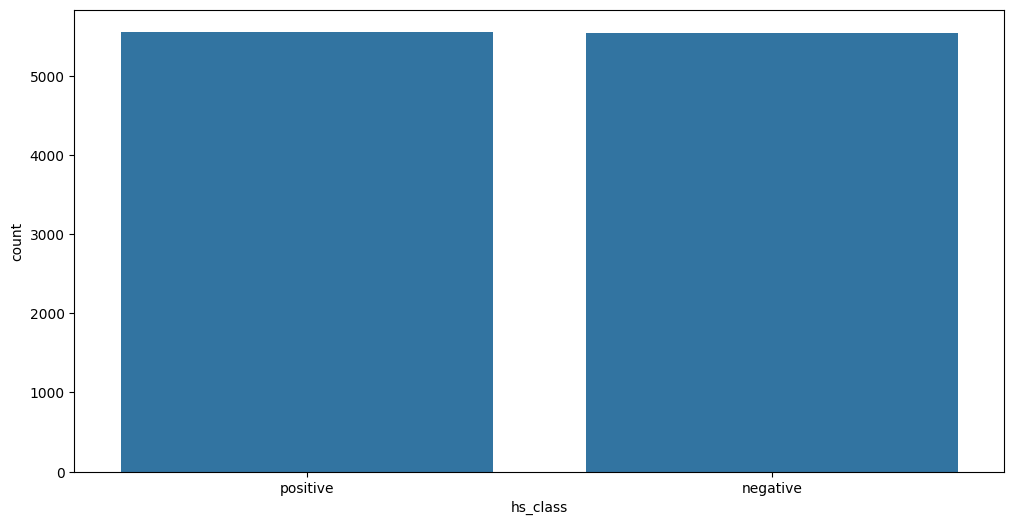

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x='hs_class',data=train)

In [113]:
fig = go.Figure(go.Funnelarea(
    text =temp['hs_class'],
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [114]:
train['temp_list'] = train['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,yg,2246
1,di,2000
2,dan,1965
3,yang,1400
4,itu,1094
5,ada,885
6,ini,871
7,',851
8,URL,715
9,dari,619


In [115]:
positive_text = train[train['hs_class']=='positive']
negative_text = train[train['hs_class']=='negative']

In [116]:
top = Counter([item for sublist in positive_text['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,yg,1114
1,di,839
2,dan,697
3,URL,506
4,itu,496
5,ini,424
6,',351
7,yang,351
8,aja,332
9,ada,321


In [117]:
top = Counter([item for sublist in negative_text['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,di,1161
2,yg,1132
3,yang,1049
4,itu,598
5,ada,564
6,',500
7,ini,447
8,dari,371
9,dengan,352
10,untuk,335


In [118]:
# # Start with one review:
# # text = positive_text.text[0]
# text = positive_text

# # Create and generate a word cloud image:
# wordcloud = WordCloud().generate(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Proses selanjutnya adalah membuang stopwords. Stopwords merupakan kata umum dalam sebuah teks yang sebetulnya tidak memiliki makna seperti “yang”, “dan”, “di”, “dari”, dll. Berikut adalah beberapa stopwords dalam bahasa indonesia yang ada dalam library Sastrawi.

In [119]:
#Define a list of stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')
print(len(stop_words))
print(stop_words[:20])

758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


In [120]:
# Create an array from the image you want to use as a mask
## Your file path will look different
pos_mask = np.array(Image.open('data/book.png'))


def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='white',
                      stopwords=stop_words,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    


There are 512834 words in the combination of all review.


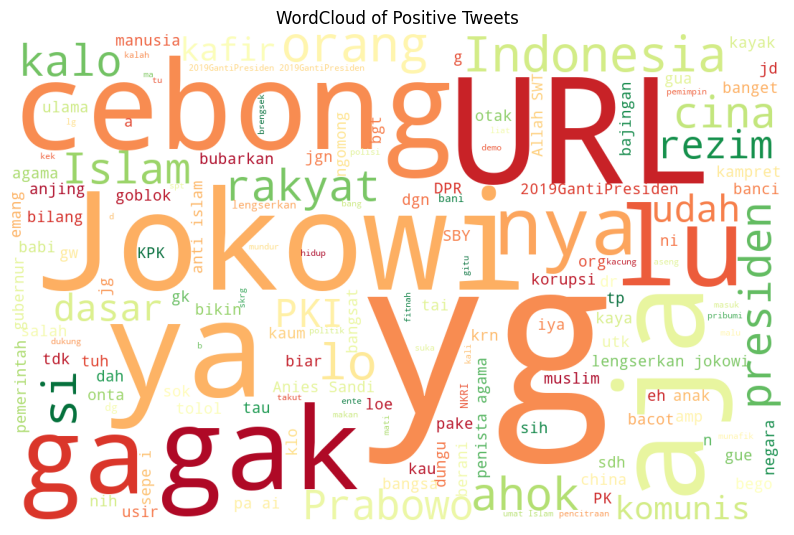

In [126]:
positive_text_temp = " ".join(review for review in positive_text.text)
print ("There are {} words in the combination of all review.".format(len(positive_text_temp)))
generate_better_wordcloud(positive_text_temp, 'WordCloud of Positive Tweets', mask=pos_mask)

There are 626116 words in the combination of all review.


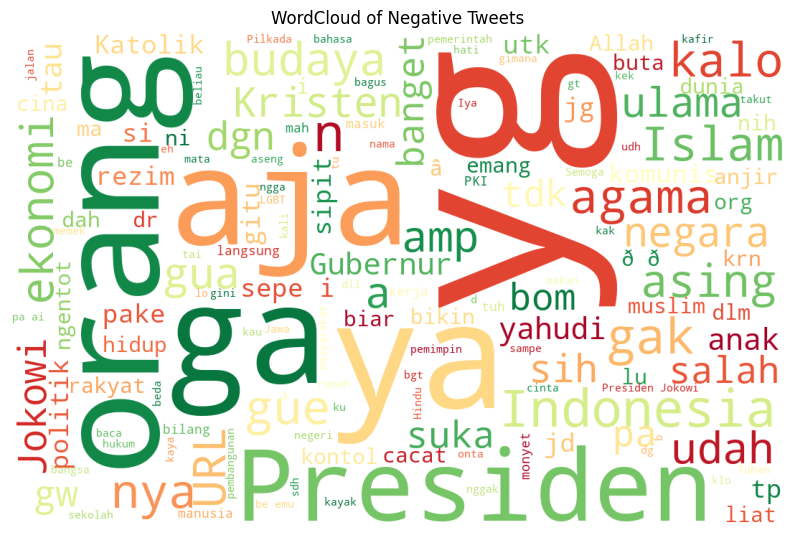

In [125]:
negative_text_temp = " ".join(review for review in negative_text.text)
print ("There are {} words in the combination of all review.".format(len(negative_text_temp)))
generate_better_wordcloud(negative_text_temp, 'WordCloud of Negative Tweets', mask=pos_mask)